In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()
# set_chinese_font()

# 1. Data Wrangling

In [2]:
data = []
for year in range(2008,2018):
    file = "./data/cn/movie_%s.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

In [3]:
df = pd.DataFrame(data)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2466,2466,2466,2466,2466,2466,2466,2466,2466,2466,2466,2466
unique,727,411,580,511,373,1738,2444,72,2200,2441,2441,24
top,0.4%,3.7%,0.0%,0.0%,3.1%,,https://img1.doubanio.com/view/movie_poster_co...,5.9,137,蛇咒,https://movie.douban.com/subject/25928812/,2015
freq,49,16,17,65,38,711,2,64,6,2,2,347


In [4]:
df.head()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
0,2.2%,24.4%,46.7%,17.8%,8.9%,tt0904013,https://img3.doubanio.com/view/movie_poster_co...,6.1,59,笨裁妙判 糊涂神判,https://movie.douban.com/subject/2596658/,2007
1,4.1%,18.4%,56.8%,17.1%,3.6%,tt1151318,https://img3.doubanio.com/view/movie_poster_co...,6.0,8730,错爱 塚愛,https://movie.douban.com/subject/2361528/,2007
2,6.4%,23.0%,49.1%,17.5%,4.1%,tt1606322,https://img3.doubanio.com/view/movie_poster_co...,5.8,2618,救我,https://movie.douban.com/subject/5155783/,2008
3,6.6%,10.1%,53.0%,21.7%,8.6%,,https://img1.doubanio.com/view/movie_poster_co...,6.3,291,欣月童话,https://movie.douban.com/subject/2277015/,2008
4,2.3%,11.2%,47.4%,31.6%,7.5%,tt0491044,https://img1.doubanio.com/view/movie_poster_co...,6.6,34533,文雀,https://movie.douban.com/subject/2976123/,2008


In [5]:
df.drop_duplicates('title', inplace=True)
df['rating'] = df['rating'].astype(float)
df['ratings_num'] = df['ratings_num'].astype(int)
df['year'] = df['year'].astype(int)
df['1_star'] = df['1_star'].apply(lambda x: float(x.strip('%'))/100)
df['2_star'] = df['2_star'].apply(lambda x: float(x.strip('%'))/100)
df['3_star'] = df['3_star'].apply(lambda x: float(x.strip('%'))/100)
df['4_star'] = df['4_star'].apply(lambda x: float(x.strip('%'))/100)
df['5_star'] = df['5_star'].apply(lambda x: float(x.strip('%'))/100)

df.rename(columns={'title': 'name', 'rating': 'db_rating', 'ratings_num': 'db_ratings_count',   
                   'url': 'douban_url', 'img_url':'image_url', 'imdb_id': 'movie_tt_id'}, inplace=True)

In [6]:
def name_to_rating(name):
    return {
        '1_star': 2,
        '2_star': 4,
        '3_star': 6,
        '4_star': 8,
        '5_star': 10,
    }[name]

df['mode']=df[['1_star', '2_star','3_star','4_star','5_star']].idxmax(axis=1)
df['mode']=df['mode'].apply(lambda x: name_to_rating(x))

In [7]:
df['std']=(df['1_star']*(2-df['db_rating'])**2+df['2_star']*(4-df['db_rating'])**2+df['3_star']*(6-df['db_rating'])**2+ \
df['4_star']*(8-df['db_rating'])**2+df['5_star']*(10-df['db_rating'])**2)**0.5

# Deviation against mode
df['std2']=(df['1_star']*(2-df['mode'])**2+df['2_star']*(4-df['mode'])**2+df['3_star']*(6-df['mode'])**2+ \
df['4_star']*(8-df['mode'])**2+df['5_star']*(10-df['mode'])**2)**0.5

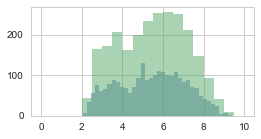

In [8]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5)

bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))

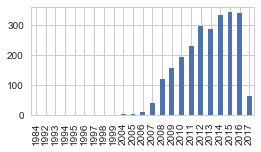

In [9]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

# 2. General Movies

In [10]:
df = df.query("db_ratings_count > 5000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,0.094299,0.155147,0.371371,0.262607,0.116586,6.303503,70559.897293,2012.276274,6.195860,1.768867,1.933261
std,0.146057,0.114186,0.133290,0.149830,0.115263,1.330460,85085.977044,3.102387,1.802128,0.237447,0.385314
min,0.001000,0.003000,0.012000,0.004000,0.008000,2.300000,5005.000000,1984.000000,2.000000,1.206715,1.303840
25%,0.010000,0.050000,0.274000,0.130000,0.039000,5.400000,14373.750000,2010.000000,6.000000,1.605397,1.697056
50%,0.029500,0.131500,0.394500,0.255000,0.074000,6.400000,38449.500000,2013.000000,6.000000,1.735798,1.851486
75%,0.101250,0.249000,0.482000,0.402000,0.152250,7.300000,93006.000000,2015.000000,8.000000,1.892564,2.042792
max,0.942000,0.424000,0.619000,0.582000,0.676000,9.200000,709045.000000,2017.000000,10.000000,3.397793,5.154028


## 2.1 Overview

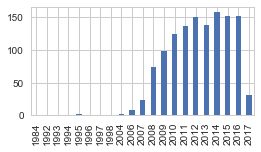

In [11]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

In [12]:
df['std'].hist(bins=20, alpha=0.5, figsize=(4,2))
plt_configure(title='STD distribution')

plt.figure()
bins=arange(0,10.5,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt.gca().set_xlim([2, 10])
plt_configure(title='Rating distribution')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAACZCAYAAAA4jB+uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEWBJREFUeJzt3XlM0+cfB/B3AavY4pCdIlZFQYegdjU43E8Rj9WpzBsD
DjdNNDIVEeMEAY9IRGW6IV7DM4EYx7ymbs6IEpk6cOu8pmE6shAR4sBjo9VRle/vD2NHBcpTLLTK
+5WY2O/zPT59hLfP8z1amSRJEoiIGuBk7wKI6MXAsCAiIQwLIhLCsCAiIQwLIhLCsCAiIQyLZvDo
0SNkZGRAq9XC398fQUFBiI2NRXFxMQCgpKQEPXr0sPgHAOLi4syW+fv7Y8iQIUhNTcWDBw+sqik6
OhpxcXEAgP3796N///5C2xUWFiI/P7/e9oKCAvTo0QMGgwEA0KNHD+Tm5lpVW00lJSXIyckxvR4y
ZAiysrIavT9qPBd7F9ASrFu3Djk5OUhISEC3bt1w584dbNy4EVOmTMH333+PDh064PTp06b1k5KS
0KZNGyQkJNTaV0hICFasWAEA+Pfff1FYWIiUlBRcu3YNGRkZkMlkVtc3cuRIBAcHC6376aefYvr0
6Xj33XfrbFer1Th9+jTatm1rdR11iY+Ph7+/P4YNGwYA2Lt3L1xdXW2yb7IOw6IZ7Nu3D4sXLzb9
Qnp5eeHLL7/EgAEDkJOTg/Hjx+P11183rS+Xy9GmTRuzZTXbai7v1KkTOnXqhHHjxuHkyZMYOnSo
1fW1adMGbdq0acQ7q+3Z+mzNw8OjyfZNlnEa0gxkMhny8/Px6NEj0zJXV1ccPHgQw4cPf+799+zZ
ExqNBseOHat3nafH6tOnD+Lj42E0Gk1tz05DNm7ciODgYAQEBGDs2LE4deoUACAyMhI3b97EihUr
EBkZaZo+bdq0CYGBgZgxY0ataQgAXLp0CaGhoQgICEBkZCSKiopMbc9OU2puHxcXh3PnzmHHjh0Y
MmQIAPNpiCRJyMrKglarRUBAAMaMGWOqFXgybVu2bBni4uKgVqsRFBSEjRs3NrabWzyGRTOYPn06
9u/fj+DgYMTFxeHAgQOoqKhA586d4ebmZpNj+Pj44I8//qizLT8/HwkJCZg2bRoOHDgANze3es8j
5OTkYPv27UhJScHRo0cRHByMmJgY6PV6pKen46233kJsbCzS09NN2+Tl5SE7OxufffZZnfvMzMzE
7NmzsX//figUCsyZMwfV1dUNvqeEhASo1WqEh4dj7969tdozMjKQlpaG6OhoHDp0CMOGDUNUVBQK
CwtN6+zduxeenp749ttvMW3aNKxfvx5Xr15t8NhUG8OiGcycORPr16+Hj48Pjhw5gri4OAwaNAgr
VqzA48ePbXKMdu3aQa/X19m2Z88eDB06FBEREfD29kZ8fDy8vb3rXLekpAStWrWCp6cnvLy8MHv2
bKSnp8PFxQXu7u5wdnaGQqGAu7u7aZupU6eiS5cu8PHxqXOfM2bMwIgRI+Dj44OVK1fixo0bFk+S
PuXm5oZWrVrB1dW11vRDkiTs3LkTs2bNwqhRo9C1a1fMnTsXAwYMwNatW03rqVQqREdHQ6VSYebM
mXB3d8fly5cbPDbVxrBoJlqtFrt27UJBQQG2bNmC4cOHIysrC9u3b7fJ/g0GA5RKZZ1t169fR69e
vUyvZTIZAgIC6lw3NDQU7du3h1arxbhx47B582Z06dLF4jkNLy8vi7X16dPH9HcPDw907NgR165d
s7hNQ+7cuYO7d++ib9++Zss1Go3ZCEulUpm1KxQKs+kgiWNYNLHCwkLT1QvgyQ9rSEgI0tLSMHLk
SPz44482Oc7Vq1fRs2fPOttkMhmefbi4VatWda776quv4rvvvsPOnTsRGBiIw4cPY+zYsWZD+2c1
dHLU2dnZ7HV1dXW9xxcdabVu3brO5dXV1WZTHLlcXmsdPmjdOAyLJlZdXY2srCycO3euVptSqUT7
9u2f+xjXr1/Hr7/+ig8++KDOdl9fX1y8eNFsWX3z9lOnTiEzMxMDBgxAfHw8fvjhB7i5uSEvL6/R
9dUMmlu3bqG0tBTdu3cH8CS0ap4MvXHjhtA+lUol3njjDZw/f95s+fnz5+udYtHz4aXTJubn54f3
338f8+bNQ2xsLPr37w+DwYCzZ8/i8OHD2Llzp1X7MxqNKC8vBwBUVVXh6tWrSE1NRUhICAYOHFjn
NlOnTsWUKVOwc+dODB48GAcPHkRhYaHpZq+aJEnC2rVr8dprr0GtVuPixYsoLy83TVsUCgWKiopw
+/Zt4Zo3bNgAT09PdOzYESkpKejVq5fp6ktAQAB2796Nt99+G3/99Rd27Nhhtq1CoUBxcTFu3bqF
N99806zt6bkgT09P+Pn54ciRIzhz5gwyMzOFayNxDItmsHbtWmzbtg27du1CcnIynJyc0KdPH2zb
tg1qtdqqfeXm5uJ///sfAKBt27bo2LEjJk2ahE8++aTebfr27Yu0tDSsXbsWX3zxBQYNGoRRo0bV
ue7gwYOxaNEipKWloaysDB06dEBSUhKCgoIAPAmeVatW4fz589iwYYNQzVFRUVizZg3KysoQFBSE
NWvWmNqWLFmCpKQkjBkzBt27d8eCBQswd+5cU3t4eDgWLVqEDz/8ED/99JPZfj/66CPcv38fa9as
we3bt+Hr64stW7agX79+QnWRdWT8pCwiEsFzFkQkhGFBRELses5Cp9PZ8/BELZpGo7Fqfbuf4LS2
4Kam0+kcriZRL2rtrLv5NeY/ak5DiEgIw4KIhDAsiEiI3c9ZOLrdx+p/JqKmCG3dz2UQvSw4siAi
IQwLIhLCsCAiIQwLIhLCsCAiIQwLIhLCS6c2wkus9LLjyIKIhDAsiEgIw4KIhDAsiEgIw4KIhDAs
iEgIw4KIhPA+i2bG+zHoRcWRBREJYVgQkRCGBREJYVgQkRCGBREJYVgQkRCGBREJYVgQkRCLN2U9
fPgQixcvxs2bN2E0GhEVFYXu3bsjLi4OMpkMPj4+WLp0KZycnJCdnY09e/bAxcUFUVFRCAkJaa73
QETNwGJYHDp0CO7u7khNTcW9e/cwduxY9OzZEzExMejfvz+WLFmCEydOoG/fvsjMzMS+fftQVVWF
iIgIvPfee5DL5c31PoioiVkMixEjRkCr1QIAJEmCs7Mzrly5gsDAQADAoEGDcObMGTg5OUGtVkMu
l0Mul0OlUqGwsBC9e/du+ndARM3CYlgoFAoAgF6vR3R0NGJiYrB69WrIZDJTe2VlJfR6Pdzc3My2
0+v1QgU05qvfm1rNmkpL/7ZTDYZGbud4/SmCdTu+Bh8kKysrw+zZsxEREYHQ0FCkpqaa2gwGA9q1
awelUgmDwWC2vGZ4WKLRaBpRdtPR6XRmNf1eIfbgl61pNNY/SPZs7S8K1t38GhNyFq+GVFRUYPr0
6Vi4cCEmTpwIAPDz80NBQQEAIC8vD/369UPv3r2h0+lQVVWFyspKFBUVwdfXtxFvgYgclcWRxZYt
W/DPP/9g06ZN2LRpEwAgISEBycnJWLduHby9vaHVauHs7IzIyEhERERAkiTMnz8frVu3bpY3QETN
w2JYJCYmIjExsdbyrKysWsvCwsIQFhZmu8qIyKHwpiwiEsKwICIhDAsiEsKwICIhDAsiEsKwICIh
DAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIh/GJkB8UvUCZHw5EFEQlhWBCREIYFEQlhWBCREIYF
EQlhWBCREIYFEQlhWBCREIYFEQlhWBCREIYFEQlpsc+G1PfsRWnp33b7flMiR8aRBREJYVgQkRCG
BREJYVgQkRCGBREJEQqLixcvIjIyEgBQXFyM8PBwREREYOnSpaiurgYAZGdnY/z48QgLC0Nubm7T
VUxEdtFgWGz

## 2.2 standard deviation

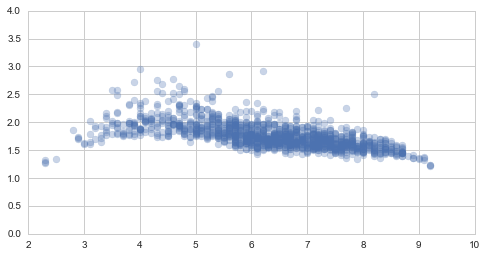

In [13]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,0,4])
plt.gca().set_aspect('equal')
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'D:/movie_output/all.html', show_ratings_num=False, click=True, show_distribution=True)

In [14]:
movie_list(df.sort_values(by='std',ascending=False))

## 2.3 Ratings Number Comparison (Converge)

In [15]:
for num in [0, 5000, 20000, 50000, 100000, 200000]:
    sub_df = df.query("db_ratings_count > @num")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,0,4])
    plt.gca().set_aspect('equal')
    plt_configure(title = num, figsize=(3,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACeCAYAAAB3j0V0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHz1JREFUeJztnWmQZFW17397nyGnmoeeJ7qbduCpKNiEBgiKT9AIwyF4
im1gGH5RJELxehUlFL1eQ8Xp3qsRiOAHXyCOISrv6dOnXq7KxYvYIQi8lrabHqi5KisrxzPv/T6c
qqK6uzqruruGrGb/PlVlZe5ambn/Z6+91l7rCK21xmAwzItcbQMMhlbGCMRgaIIRiMHQBCMQg6EJ
RiAGQxOMQAyGJhiBtAhRFPGZz3yGyy67jMsuu4wvfvGLJEmy2mY957FX2wBDyle/+lUefPBBvvnN
b9JoNPjoRz9KW1sb73//+1fbtOc0wiQKV58gCLjsssv4yle+wtVXXw3AT37yE770pS/x4IMPIqVZ
6FcL88m3AAcOHMDzPPbu3Tv72KWXXkqxWOT48eOraJnBCKQFGB0dJZfL0d7ePvtYf38/ACMjI6tl
lgEjkJbA8zwymcwJj7muC0AYhqthkmEaI5AWIJvNniKEmd9zudxqmGSYxgikBdiwYQONRoNarTb7
2Pj4OADr169fLbMMGIG0BM9//vPJ5XLs379/9rE///nP9PX1sW3btlW0zGAE0gJks1muu+46PvOZ
z7B//37++Mc/8pWvfIV3vetdq23acx6TB2kRgiDgs5/9LL/4xS9wXZe3vOUt/OM//qPJgawyRiAG
QxPM5clgaIIRiMHQBCMQg6EJRiAGQxOMQAyGJhiBGAxNMAIxGJpgBGIwNMEIxGBoghGIwdAEIxCD
oQlGIAZDE4xADIYmGIEYDE0wAjEYmmAEYjA0wQjEYGiCEYjB0AQjEIOhCUYgBkMTjEAMhiYYgRgM
TTACMRiaYARiMDTBCMRgaIIRiMHQBCMQg6EJRiAGQxOMQAyGJixKIMVikSuvvJLDhw8vtz0GQ0ux
oECiKOK2224jm82uhD0GQ0uxoEBuv/12rr/+etatW7cS9hgMLYXd7I/33XcfPT09XHHFFdx1112L
GnDuffYMhlbjkksuOaPnN73D1Dvf+U6EEAghOHDgADt27OAb3/jG7E3u52P//v1nbMRqYOxcOtaC
jXB2djZdQe69997Zn2+44QY+/elPNxWHwXC+YcK8BkMTmq4gc7nnnnuW0w6DoSUxK4jB0AQjEIOh
CUYgBkMTjEAMhiYYgSwRidL4QUyiTptWMqxBFh3FMsyP1prDg1OMlzziRGNbgv7uHLs2dyGEWG3z
DOeIWUHOkcODU0yUfCwpyTgWlpRMlHwOD06ttmmGJcAI5BxIlGa85CHliSuFlILxkmfcrfMAI5Bz
IIoS4mR+EcSJJoqSFbbIsNQYgZwDjmNhW/PvM2xL4DjWCltkWGqMQM4BS6YbcnWSK6WUpr87hyXN
Jn2tYwRyjuza3EVfd5ZEKYIoIVGKvu4suzZ3rbZphiXAhHnPESEEu7d0c8GmLqIowXEss3KcRywo
kCRJ+MQnPsGRI0cQQvBP//RP7NmzZyVsWzYSpQljRaL0kk1mSwqsjLnenG8s6GI98MADAHz/+9/n
5ptv5l/+5V+W3ajlQmvNoYESf3pymIODPn96cphDAyWaFFW2FCZbv/IseMl77Wtfy1VXXQXA0NAQ
HR0dy23TsjE3qedYYjapB1Ps3tK9orYkSi/aJTPZ+tWjaU36XG655RZ+/etf87WvfY3LL7/8tM9r
1aYNSmmeGvSZby4qDc/bnD0l4bccaK0ZnowoN5JZF68zb7GxxzntZB8qhpQbMXLO35XWdOZtNvW6
y27z+cSSNm04mfHxcd72trfx85//nHw+P+9zWrWA3w9iHjkwSmY6N3Ho0CF2794NQBAlvPwF63Ec
a96r+plc7Rfi0ECJiZJ/ghiV0vR1Z+ddxR555M/E2U1Y8lRvOFGKvRdtXPWgQKt+5yez5E0bAH76
058yOjrKe9/7XnK5HEII5DxfVqvjOBZSQBgl2NaJ9tsSjo9WKJZ94kQjJXQVsuzZ3sWxkcqSuTYz
R1NOnuwzR1Mu2NR1ymSPlSZONNY8H/lMtt4EB5aPBT/Z173udXz84x/nne98J3Ecc+utt665Lota
a44MTTFaajBVCbAtSbkasUtrtAY/SpgsB0ghKJYbVOohcVziP/86SF93js19bWQciVKaobE6Smn2
bOs5YztmjqacyWS3pQCTrV81FhRIPp/n3/7t31bClmVjZnO+ua8NKQSVekjVSxgcr3HRrl7UlEJK
wdBEjUo9RAqBbUtGi3Uyjs0QNYSQVGoBidIcHizhRwkv3NF7ymrUjLM5miKns/XzuWUmW7/8nDdr
88w+QVoSlajZ/cLJbs2mvjbW92oIiqzvzbOlv52xSQ8hNeVagNaATCdgnGi01hwfrtLVkUEKQbUe
UKmHeMEgB4+VuHhP/6Jcrhn7ejuz6Wp1BpM9zcrPH8UyLC9rXiAzIdCxyQaD43XqXkgh57Clv43+
njyb+9pOcWssIbClQClAgCVhcLTKM6M1pAAhIGNbSKEREiqNdMxaI2Ss1CCMFUIKpmoBQqQ2XLh1
fpfrlBCtTF26jGORKBY12ddatn4pgxqrzZoXyIz7NFby8YIYKSXVesSw1UCIdN/QzK3JujZBlFD1
IiwJdT8mDBNipbClJB4oU24E1P2IsckGWkMhZ+MHMbmMTbka8vjhIjs3d887GQ4+U2J0ooHjWmSc
VKU5IenuzLB9fccZTaJWz9afj/ma1v20F8GM+yQQlGs+5VpIw49QCkYm6whAa0VPV47SyW6NTt0a
gKxj0d2e4fhoBc+PsCxJIeuQKIUXxXhBQqIhThSOJRFCEEQJSoNtS0qVAD+MKWSd2fHjRHHg6Uke
OTBMosB1JJ1tGTb2FpBSMFn22b1lflGtVeYmYmdW7NVKxC4Va1ogM1EhgaZY9gmjBCEElgVJAqVK
QJwoLt6zDksKRosN/DAh61p05m12bOykWg8IY82GngJT630m8y5+kKCVZqLcoK3gIgXo6eMdQgii
OB1DkCYZE5XMHnmfuYo+dnCcwwNlhidrZGybjoLLVCVAa83m/vbzLkR7NiHstcCa/nZmokJKQxDG
J+RnpEyv7rVGSJikBxOZ3l/EieaZiYCHHhtEC8GRoSkKuQxKaXras9CumSh5BKECIsJY0TadR/HD
GFtJutstEqUYGKmQzdo8+tQYPV1ZbCkoTgU8M1qlXAvw/ISGTqj7EZ0FF41mQ1/baaNW8/nva8Gn
P5sQ9lpg7Vk8h5mCpaGxOhnXnl1BtNbkMjalsk+YJNz/+0PEsaar3WWi7HN0qMLYRI2BqaPs3NRN
d4fD8dEyYyWfgmvTCCO0TkXm2DJ1iWo+np8eFNSBBjQ97RnWdedoy2c4+MwU9b+HhEHCto0djBQb
KK1xbUmUKOIkrRcZmfQI/JgtG9pOmOzz+e99XVkGJwLCJ4db3qc/X6sr17RAIA2BJkrT3e5SqoYE
QUwmY6OUSjfeQnB0uIpjSf52tIRlQRhrbEsSxYqxUo3JqkUQxlRqPp5l4UUxedfGtiRaa7wgTk/R
ao2aPplTrYVIIdnQqzl4vEi5FhLFqQieGa2ke5JCFte1IIQgUiQKkiSmuzMzG7WaWR2Oj1aYLAcn
+O+PHy4yMBawYUv62LkmKs+FhVYx6zzN16x5gSgN29d3oF+kGZv0kELghzGPHxrHsSRZ18YLYjQw
VQtIlEJKSRAkJCJMs+r1Gpt629jQ24ZjCcamfIQAL4hoyzvEcUKiNXGsEaQri2VJVJJwaGCSSiMG
NFGkiRNFrVFDA7lqSDZjk3Us2ttcutszZF1rdsN6aKDEeMkjjBVPD0zRnnfZ0FcADUIKKrWQup8Q
RQnjZZ9y1Se

## 2.4 Time Shift

In [16]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(figsize=(4,4))
fig, ax = plt.subplots()
sub_df=df.query("db_ratings_count > 20000")
scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(figsize=(4,4))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAAD3CAYAAAAHbAHDAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvVmMXdd55/tba+3hjDUXi5NFS7LpSZ3QQ4L4xoZ9lU53
kHQAG5ItK0FswIIRBN1opJUeosAwFCOQHCSGM6Dt7gQIEujFTvTQiZ3AaCdWJxfGvbZFR44lS6JF
URyLNZ464x7XWvdh7XNYRRbJquIgkrV/LxLPqWHvU2d95xv/n7DWWkpKSkq2iHy9L6CkpOT2ojQa
JSUl26I0GiUlJduiNBolJSXbojQaJSUl28J7vS9gyNGjR1/vSygp2bW8+93v3vLX3jJGA7Z34bcb
R48evaH3p43lOy/Mo+SlzqM2hp98xz6UFDfkd9/oe3u92Q33tx3K8OQOIcs0ud685SbXlizTN/mK
Su5USqNxh+D7Ck9t7kl4SuD76iZfUcmdSmk07hCUFMxOVjFmo7dhjGV2snrDQpOS3UdpNO4g7j0w
wcxkBW0MSabRxjAzWeHeAxOv96WV3EHcUonQkmtDCMGbDk5y9/4Jskzj+6r0MEquO6XRuANRUqDC
8k9bcmMow5OSkpJtURqNkpKSbVEajZKSkm1RGo2SkpJtURqNkpKSbVEajZKSkm1x1bqc1ppPf/rT
nDhxAiEEv/3bv83hw4dHz3/ta1/jL/7iL1BKcfjwYR5//HGklHz4wx+m0WgAcPDgQZ588skbdxcl
JSU3jasajWeeeQaAL3/5y3z729/mC1/4Al/60pcAiOOYP/iDP+CrX/0q1WqVRx99lGeeeYb3ve99
WGt56qmnbuzVl5SU3HSuajT+9b/+13zwgx8E4Ny5c4yNjY2eC4KAL3/5y1SrVQDyPCcMQ1566SWi
KOKTn/wkeZ7z6KOPcuTIkRtzByUlJTcVsdUVBv/tv/03vvGNb/BHf/RHvO9977vk+aeeeop//Md/
5E//9E85duwY3//+9/nIRz7Ca6+9xqc+9Sm+/vWv43mXt1GlCE9JyevHtvRC7DZYXFy0H/zgB22/
3x89prW2n/vc5+yv/uqv2sFgYK21NkkSG0XR6GseeOABe+7cuSv+7GeffXY7l3LbcSff3518b9aW
93cxV62e/K//9b/4n//zfwJQrVYRQiDXqUN95jOfIUkSvvjFL47ClKeffprPfe5zACwsLNDr9Zid
nd2O4SspKblFuWpO49/8m3/DY489xi//8i+T5zm/9Vu/xTe+8Q0GgwH33XcfTz/9NO95z3v4xCc+
AcDHP/5xHnzwQR577DEefvhhhBA88cQTVwxNSkpKbh+uepJrtRp/+Id/eNnnX3rppU0f//znP7/z
qyopKbllKZu7SkpKtkVpNEpKSrZFaTRKSkq2RWk0SkpKtkVpNEpKSrZFaTRKSkq2RWk0SkpKtkVp
NEpKSrZFaTRKSkq2RWk0SkpKtkVpNEpKSrZFaTRKSkq2RWk0SkpKtkVpNEpKSrZFaTRKSkq2RWk0
SkpKtsVVjYbWmscee4yPfexjPPzwwxw7dmzD89/85jd54IEHeOihh/jLv/xLAIwxfOYzn+Ghhx7i
V37lVzh58uSNufqSkpKbzlWNxvq9J7/+67/OF77whdFzWZbx5JNP8md/9mc89dRTfOUrX2F5eZm/
//u/J01TvvKVr/Abv/EbI73QkpKS259r2nty/Phx7rrrLsbHxwEng/7d736X5557jve///0AHDly
hOeff/4GXHpJScnrwZbUfj3P27D3ZEiv16PZbI7+Xa/X6fV69Hq90UpGAKUUeZ5fVVz4Tt99ciff
3518b3Dn39922LJE+O/+7u/yn//zf+ajH/0of/u3f0utVqPRaNDv90df0+/3aTablzxujNmSGvm2
FrbcRmhj+c53n+Unf+I9KCle78u57hw9evSO/dvB7ri/7XBNe0/uvfdeTp48ydraGmma8uyzz/LO
d76Td73rXfzTP/0TAM8999yGhdG7CWstr5xp8Z0X5jl2NuY7L8zzypkWdmtL7UpKbkmuae/JQw89
xG/+5m/yyCOPYK3lgQceYG5ujp/92Z/lW9/6Fh/72Mew1vLEE0/cjHu55Th+do3lVoySEl8JlJQs
t2JgjTcdnHy9L++Goo0lyzS+r+5I72o3c817T+6//37uv//+DY9JKfnsZz977Vd3G6ONZakVoeRG
Z05KwVIr4u79E3fkYbLWcvzsGkutiFxbPCWYnaxy74EJhLjz7nc3UjZ33SCyTJPrzcOQXLtP4TuR
9d5V6KuRd3X87NrrfWkl14nSaNwgfF/hqc0/WT0l8H11k6/oxjP0ruRFHtTQu9KmzOXcCZRG4wah
pHPLzUUHxRjL7GT1jgxNdqt3tdsojcYN5N4DE8xMVtDGkGmLNoaZyQr3Hph4vS/thrAbvavdSLnK
/QYihOBNBye5e/8EDM7yk+/Yd0d6GEOG3tVyK94QotzJ3tVupPQ0bgJKCgJP3jaHRhtLnOQ7ykGs
966STN/x3tVupPQ0SkZcj3Lpeu+q7NO4MymNRsmI9eVSVfigO21GU1KgwvLtdSdShiclQFkuLdk6
pdEoAcpyacnWKY1GCVCWS0u2Tmk0SoDd2YxWsjNKo1EyoiyXlmyFMr19G3CzxszLcmnJViiNxi3M
6zVmXpZLS65EGZ7cAlyuA7McMy+5FSk/Tl5HruRJGMuuFPEpufW5otHIsozf+q3f4uzZs6Rpyq/9
2q/xMz/zMwAsLS3x6KOPjr72xRdf5Dd+4zd4+OGH+fCHPzxSIz948CBPPvnkDbyF25crdWAenG2S
azt6fD3DvokyhCh5Pbjiu+5v/uZvmJiY4Pd+7/dYW1vjQx/60MhozM7O8tRTTwHwz//8z3zhC1/g
ox/9KEmSYK0dPVeyOVeTA7xr73jZN1FySyLsFaSx+/0+1loajQatVosHH3yQf/iHf9jwNUNB4d//
/d/nnnvu4fvf/z7/9b/+Vw4cOECe5zz66KMcOXLkqhdyp+2VMMaSG4snxSWt2QBpbjh2NsbfxDBk
2nL4QIXldk57kCPXJT2NtYzXPPZPBzf0+kt2F9tZ0XBFT6NerwNuKdJ//I//kV//9V+/5Gu++c1v
8uY3v5l77rkHgEqlwiOPPMJHPvIRXnvtNT71qU/x9a9/fdfsPbk4T0GRp1g7f5z3vOc9o6/TxkJt
/hJPwz1n+Ml37EMKbguR3t2wF+ROv7/tcNWTPD8/z7//9/+eX/qlX+IXf/EXL3n+b/7mb/j4xz8+
+vfdd9/NoUOHEEJw9913MzExwdLSEvv27dvWhd2uXC5PsbSabfi6ywnWZNowUQ+Bsm+i5NbkiiXX
5eVlPvnJT/Jf/st/4cEHH9z0a55//nne9a53jf799NNPjxY+Lyws0Ov1mJ2dvY6XfOtypUnR9kBf
UlLd2IGZc2apy8JKn5VOtGGxkpKCSuiVBqPkluCKnsb/+B//g06nwxe/+EW++MUvAvCRj3yEKIp4
6KGHWF1dpdFobHCVH3zwQR577DEefvhhhBA88cQTWwpN7gSGk6KbVTyGXZ3rKx7rPYmXTq6ghMTz
LnzzblmsVHJ7ccXT/OlPf5pPf/rTl31+amqKv/7rv97wWBAEfP7zn78+V3ebcaVJUSWvXPHo9NIN
BgPKnoySW5OyI/Q6cqVJ0fHa5fMR29GyuBb9zpKS68HuiBtuIm4i9NKKh5f4l/2erWhZlOsOS24V
SqNxnblcxePowuUP9lak/18507pu+p0lJddCGZ7cILZb8biSlkWp31lyK1F6GrcIV+rJyNK8nEMp
uWUo32m3GJtpWZT6nSW3EmV4chtwuapMnhvGGuUMSsnNpfQ0tsHNkt3bjPVVmSw3LK9FIEBbw3de
mC8rKSU3jdJ

In [17]:
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,0,4])
    plt.gca().set_aspect('equal')
    plt_configure(title=year, figsize=(3,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACeCAYAAAB3j0V0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF5VJREFUeJzt3XmMVfXdx/H37yx3m7mzwQADCiKV0u3RR6xocKG1rbaJ
aTCkRQxN4z+tNbE0SqiUUltsXf7QqpEi+IcGtbZNTYtNY6ON6SKJFatWKNVHUGSGGWa7s9z1LL/f
88dlpgMM5wLOcmG+r8SEueecO98zns/5Lefce5QxxiCEGJU12QUIUc0kIEJEkIAIEUECIkQECYgQ
ESQgQkSQgIyTjo4ObrvtNpYsWcLSpUu588476e/vB8D3fX7yk5+wZMkSlixZwv33308YhsPbVlqe
zWZZv349l112GZdddhnr1q0jk8lM+D5OCUaMuSAIzPLly83NN99s9u7da9566y2zfPly861vfcsY
Y8y9995rvvjFL5o33njDvPLKK2bp0qXm0UcfHd6+0vI77rjDrFixwuzZs8fs3r3bLF++3HznO9+Z
8P2cCiQg4+Dtt982CxcuNJ2dncOv7dq1a/i1Cy+80Lz00kvDy5577jlz+eWXmzAMTbFYjFxujDEX
X3yxef7554eX79ixw1x00UUTsGdTj3SxxsGcOXPYtm0bzc3Nw68ppQBoa2ujUChw6aWXDi+75JJL
6Onp4cMPP2Tv3r2RywEaGxt5/vnnGRwcJJvN8oc//IFPf/rTE7R3U4sEZBw0NjZy1VVXHfXaE088
wbx58zh8+DDJZJJ0Oj28bChIHR0dFZcDbNq0iT179vDZz36WSy65hP379/PAAw+M925NSRKQCbB1
61ZefPFFfvCDH1AoFIjH40ctj8ViAHieV3E5wP79+5k/fz5PPvkkTz75JOl0mrVr12Lktrox50x2
AWe7Rx99lIcffpiNGzdy9dVX88ILLwwf6EOGfk4mkyQSicjlH374IXfffTcvvPAC8+bNA+CRRx7h
mmuu4R//+AdLliyZgL2aOqQFGUc//elPeeSRR7jrrru46aabAJg1axb5fJ5sNju8XldXFwAzZ86s
uHz37t0kEonhcEB5zNPY2MjBgwcnYremFAnIOHnooYd46qmnuOeee7jxxhuHX1+0aBHJZJLXX399
+LVdu3Yxffp05s6dW3H5zJkzyefztLa2Di/v7u6mr6+PuXPnTszOTSWTPY12NtqzZ49ZtGiRuf/+
+01nZ+dR//m+bzZt2mQ+//nPm127dpmdO3eapUuXmi1btgxvH7U8CAJzww03mJUrV5q3337b7Nmz
x6xevdqsWLFieBpYjB1ljIzsxtqDDz7Ili1bRl32/PPPM2/ePO6++27++Mc/EovFWL58OXfccQeW
VW7QS6VS5PLu7m7uvfdedu7ciTGGpUuXsn79epqamiZsH6cKCYgQEWQMIkQECYgQESQgQkSQgAgR
QQIiRAQJiBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRQQIiRAQJ
iBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRQQIiRISTCkhPTw9X
X301+/btG+96hKgqFQPi+z4bN24kkUhMRD1CVJWKAbnvvvtYuXIlM2bMmIh6hKgqkU+5fe6552hq
auLKK69k69atJ/WGI5+tJ0S1Wbx48SmtH/mEqZtuugmlFEop9u7dy3nnnccvfvGL4Qfbj+b1118/
5SImg9Q5ds6EGuH06oxsQZ5++unhf69evZq77rorMhxCnG1kmleICJEtyEjbt28fzzqEqErSgggR
QQIiRAQJiBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRoeLdvGEY
smHDBt5//32UUvz4xz9m4cKFE1GbEJOuYgvy8ssvA/Dss8+yZs0aHnzwwXEvSohqUbEF+cIXvsCy
ZcsAOHToEHV1deNdkxBVI/Iz6SOtW7eOF198kYcffpgrrrjihOvJlzaIanbKn503p6Czs9MsW7bM
5HK5E66za9euU3nLSSN1jp0zoUZjTq/OimOQ3/3udzz22GMAJJNJlFJYlkx+iamh4hjkS1/6Enfe
eSc33XQTQRCwfv16+ZZFMWVUDEgqleKhhx6aiFqEqDrSVxIiggREiAgSECEiSECEiCABESKCBESI
CBIQISJIQISIMCUDEmqDF2hCfVL3aYop7KQff3A2MMawr62PrkyBd9uKkGqnuTHJgjkNKKUmuzxR
haZUC7KvrY/uTBHbsnBthW1ZdGeK7Gvrm+zSRJWaMgEJtaErU8Cyjm4pLEvRlSlMue5WqA3FUjDl
9vtUTZkulu+HBKHBHuWUEIQG3w+x49X55wh1uT7XtbGtj9YVHNnNDEKDYyvpZkaIPCJ832f9+vW0
tbXheR633HIL11xzzUTVNqZc18axRz8AHFvhuvYEV1SZMYZDPR7envYxO5hHdjOHThbdmSLQx8fO
aRy74s8SkV2sHTt20NDQwDPPPMPjjz/Opk2bJqquMWdb5YNLH9Ol0NrQ3Jg8pTNzVPdkaJkX6I/c
hdnX1kd/PsC2LOKu/ZHHTNLNPHWRLch1113HtddeC5TPZrZdfWfZU7FgTgNQ7l74oSHUeviMfDKC
UPPOBxn6ckW05qgzOpQP6I6eHAc7Bil6IbUpl3Oaa2luSp3yWX/4YFajH8zzZzeccncrqpvp+ZrB
XIl0Tfwjd+POJif1pQ3ZbJZbbrmFr33ta1x//fWR654JX9qgtSHQBsdSx51NR2OMob3X5/3DRbLF
ENuyqIlbNKZtjIH6lIMxhgOdJTr6PAoljWUpYo5iVoNLU51Lfcph9rTYSdfoBZp324q4o3QL/dCw
cE6CmHNqcyxaG95pK2Ip0MagNShl6MuF5IqaWQ0ujmNRn7JpaXJHDfSp/u2qzal+aUPFUWl7ezu3
3norq1atqhiO0y1iooXa8I/XdnHx4sWRZ8uhwfGHhwfw3CIZv48mS6GNIQg0qbo4c5rT+GHIoe4s
oZOlpLN4OiQIQqzAwgy6nDO3hcaGBIsWzcR1bHSoTzjg9gJNvuARj7sEsXb+7739LFr4MRzHKh+c
oUYpuPQzs0/rTN8wq5e33+slm/cItWEgW0LbsOiCNLOnp4FyCBoaE0eNSY4d3DOi9fznP/9Z9f/P
4fRO3pEB6e7u5uabb2bjxo1cfvnlp11YtTjZC4Uj1/MCzfttfdQk4wShJpv1yRd9tIaO3hwGqEvF
2N/aTxAaCl553KGUIgw0fYMl9rdl2N+qOHg4S8kPqEnGmNNcw4wRXS+tNX95o5UD7QOU/JCOnjy5
go9fyNI+cADHdpjZlEQD9bUx/vN+Lx8/rxFnRH/ppGe7lAFV3s98ySeZcIcXDYWwvStHy/RaEjEH
21KRg/uzWWRAtmzZwsDAAJs3b2bz5s0AbNu27Yz90oYTXSg8dgbnqINBGYxR5IserZ1ZYq6FUgrb
hjCEvoESpVJIySsfmGFg8ENNGGoM5b59V6aAbSmm1SdxHZtCKaAzU8RSFn7QS8u0Gl77dweHunM4
ts3BzizZvIc2hsGixuvJU/QC2ntjzJlRi6UMr/yrjf8c6OHChc2cP7ue/Yf6Tzh1OxQcy7bo7ity
TnOa0BgKBR+jIO7Y9Gc9tMkykC3SlSlQ8AJaOweZ11LHtIYkPX0FnGPGoEPjIafC4H4sp6knWmRA
NmzYwIYNGyaqlnE1NOi1j/nKomMHvceuZzsW9pFxQNHzcZ3YcGtjWZSXKUMy4eD5mlDrI90gBabc
HfJ9TckYhg4NSyn6Bwt09ebozORpqk/x3sFeGtJx5jTX0DdYDmepFJIvhliuxrFs+nMedGbpGyxR
k4jRnSngBYb

# 3. Popular Moives

In [18]:
df = df.query("db_ratings_count > 20000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,0.063494,0.127768,0.366913,0.302045,0.139786,6.653686,102770.847666,2012.251843,6.633907,1.723936,1.866991
std,0.112378,0.107131,0.130842,0.143986,0.126773,1.236899,90624.539581,3.177290,1.639347,0.205447,0.301795
min,0.001000,0.003000,0.021000,0.004000,0.009000,2.300000,20249.000000,1992.000000,2.000000,1.206715,1.320606
25%,0.007000,0.035250,0.266500,0.179000,0.049250,5.900000,40656.750000,2010.000000,6.000000,1.579083,1.666433
50%,0.019000,0.090000,0.385000,0.319500,0.094000,6.800000,71384.500000,2012.000000,6.000000,1.691804,1.815489
75%,0.065000,0.210750,0.475000,0.429000,0.188000,7.600000,134352.500000,2015.000000,8.000000,1.839253,1.980151
max,0.929000,0.400000,0.595000,0.569000,0.676000,9.200000,709045.000000,2017.000000,10.000000,2.651356,3.793152


In [19]:
movie_list(df.query("db_ratings_count > 100000").sample(frac=0.03).sort_values(by='db_rating',ascending=False), len=8)

In [20]:
df['std'].hist(alpha=0.5, figsize=(4,2))
plt_configure(xlabel='STD', ylabel='Frequency')
plt.figure()
bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt.gca().set_xlim([2, 10])
plt_configure(xlabel='Rating', ylabel='Frequency')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAACZCAYAAAAM9d6yAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEPZJREFUeJzt3WtMU3cDBvCnBQpK8bLhjAo4UZAZ41SmYBSdwoLXoIJV
mgkJzg2icTBiUMdQNqe+gU0XIjrMljnUKUOdujk0KAaDkWg3vM37pkZQ411bhZbxfz8YO6tYDnoO
bfH5feo5bU8fDoeHc69KCCFARPSS1I4OQEStA8uEiGTBMiEiWbBMiEgWLBMikgXLhIhk4e7oAC/C
YDA4OgLRKys0NLTR8S5ZJsDzfyApDAbDS71fTs6UBXCuPMzSOEdmsfePnJs5RCQLlgkRyYJlQkSy
cNl9Jq1F2dG7OH3jlKNjWNXU2ObRR4c4MA25Eq6ZEJEsWCZEJAuWCRHJgmVCRLJgmRCRLFgmRCQL
lgkRyYJlQkSyYJkQkSxYJkQkC5YJEcmCZUJEsmCZEJEsFLlq2GKxYMGCBaiurobZbEZKSgp69eqF
efPmQaVSISgoCAsXLoRarUZRURE2btwId3d3pKSkYOTIkUpEIiKFKVIm27dvR4cOHZCTk4M7d+5g
4sSJCAkJQWpqKsLCwpCVlYU9e/agf//+KCwsxObNm1FXVwe9Xo+hQ4dCo9EoEYuIFKRImYwePRrR
0dEAACEE3NzccOLECQwePBgAMHz4cFRUVECtVmPAgAHQaDTQaDQICAjAqVOn0K9fPyViEZGCFNln
4u3tDa1WC6PRiDlz5iA1NRVCCKhUKuvz9+/fh9FohI+Pj837jEajEpGISGGK3WntypUrmDVrFvR6
PSZMmICcnBzrcyaTCe3atYNWq4XJZLIZ/2S52POyX3fhTF+XUVNT4+gINp7MYzCY7LxSec70e2IW
+xQpkxs3biApKQlZWVkYMmQIAKBPnz6orKxEWFgYysvLER4ejn79+mHFihWoq6uD2WzG+fPnERwc
LOkzWstXXZQd3YuuXbs6OoZVTU2NTZ7QUMfdttGZfk/M8t9nP48iZbJ69Wrcu3cP+fn5yM/PBwB8
+umnWLx4Mb7++msEBgYiOjoabm5umD59OvR6PYQQSEtLg6enpxKRiEhhipRJZmYmMjMznxm/bt26
Z8bpdDrodDolYhBRC+JJa0QkC5YJEcmCZUJEsmCZEJEsJJXJzJkz8fvvv8NisSidh4hclKQy+fDD
D7F//35ER0cjOzsbR48eVToXEbkYSYeGBw0ahEGDBqG2thYlJSWYM2cOtFot4uLioNfreWEeEUk/
z6SyshLbtm1DRUUFhg8fjrFjx6KiogIpKSn47rvvlMxIRC5AUpmMHDkSfn5+iI2NRVZWFry8vAAA
gwcPRlxcnKIBicg1SCqTtWvXwtvbG6+//jpqa2tx8eJFdO/eHW5ubti6davSGYnIBUjaAbtv3z58
8MEHAICbN28iOTkZmzZtUjQYEbkWSWVSVFSE9evXAwC6deuGLVu2NHqdDRG9uiSVicVisTli4+Hh
oVggInJNkvaZREVFITExEWPGjAEA7N69G6NGjVI0GBG5FkllMnfuXJSUlODQoUNwd3dHQkICoqKi
lM5GRC5E8nkmPXv2hK+vL4QQAIBDhw5h0KBBigUjItciqUyys7NRVlYGf39/6ziVSoUff/xRsWBE
5FoklUlFRQVKSkqsJ6sRET1N0tEcf39/6+YNEVFjJK2ZtG/fHuPGjbN+YdZjS5cuVSwYEbkWSWUS
ERGBiIgIpbMQkQuTVCaTJk3C5cuXce7cOQwbNgxXrlyx2RlLRCRpn8nOnTuRkpKCL7/8Enfv3sW0
adOwbds2pbMRkQuRVCZr1qzBTz/9ZL1yeOvWrSgoKFA6GxG5EEllolarodVqrcNvvPEG1Grei5qI
/iNpn0lQUBDWrVuH+vp6nDx5Ehs2bEBIiOO+g5aInI+kMsnKysKqVavg6emJBQsWIDw8HBkZGUpn
IyewYdcp2aepj+Y/otZIUpm0bdsW6enpSE9PVzoPEbkoSWUSEhIClUplM65Tp04oLy9XJBQRuR5J
ZXLq1H+ruhaLBaWlpaiqqlIsFBG5nmYfkvHw8MCYMWNw8OBBJfIQkYuStGbyyy+/WB8LIXD27Fne
upGIbEgqk8rKSpvhjh07Yvny5YoEIiLXJKlMeHUwETVFUpmMGjXqmaM5wKNNHpVKhT179sgejIhc
i6QymTBhAjw8PKDT6eDu7o4dO3bg2LFjSEtLs/u+I0eOIDc3F4WFhbh48SLmzZsHlUqFoKAgLFy4
EGq1GkVFRdi4cSPc3d2RkpKCkSNHyvKDEVHLklQm+/fvx5YtW6zDiYmJmDx5Mrp16/bc96xZswbb
t29HmzZtADzaVEpNTUVYWBiysrKwZ88e9O/fH4WFhdi8eTPq6uqg1+sxdOhQmxswEZFrkHxo+MCB
A9bHZWVl8Pb2tvv6gIAA5OXlWYdPnDiBwYMHAwCGDx+OAwcO4OjRo9a7t/n4+CAgIMDmnBYich2S
1kw+//xzZGRk4MaNGwCAwMBA/O9//7P7nujoaFy+fNk6/Hj/CgB4e3vj/v37MBqN8PHxsb7G29sb
RqOx2T8EETmepDLp27cvfvvtN9y6dQuenp5NrpU05slbFphMJrRr1w5arRYmk8lm/JPlYo/BYGh2
BjnfL6eamhpHR7ChdB6DwdT0i6yvdZ7fE7PYJ6lMqqurkZmZierqaqxfvx4pKSlYsmQJ/Pz8JH9Q
nz59UFlZibCwMJSXlyM8PBz9+vXDihUrUFdXB7PZjPPnzyM4OFjS9EJDQyV/9tMMBsNLvV9OZUf3
omvXro6OYVVTU6N4ntBQaVcNO9PviVn+++znkbTPJCsrCzNmzEDbtm3h6+uL8ePHN/sWBBkZGcjL
y8PUqVNhsVgQHR2NTp06Yfr06dDr9UhMTERaWho8PT2bNV0icg6S1kxu376NYcOGITc3FyqVCjqd
DuvXr2/yfX5+figqKgIA9OjRA+vWrXvmNTqdDjqdrpmxicjZSFoz8fLywtWrV607UA8fPszDt0Rk
Q9Kayfz58/HRRx/h0qVLiImJwd27d/HNN98onY2IXIikMrl58yaKi4tx4cIF/PvvvwgMDOSaCRHZ
kLSZk5OTAw8PDwQFBSEkJIRFQkTPkLRm4u/vj/nz5+Ptt9+Gl5eXdfzEiRMVC0ZErsVumVy7dg2d
O3dGx44dATy6cO9JLBMiesxumSQnJ2Pr1q1YunQpvv/+eyQlJbVULmrFpH59Rk3NXZy+0fRr+dUZ
zsHuPhMhhPXxjh07FA9DRK7Lbpk8eUOkJ4uFiOhpknbAAmj0TmuvIiW+4Y6oNbBbJmfPnkVkZCSA
RztjHz/m7RqJ6Gl2y2TXrl0tlYOIXJzdMrF3W0Yioic1+xv9iIgawzIhIlmwTIhIFiwTIpIFy4SI
ZMEyISJZsEyISBYsEyKSBcuEiGTBMiEiWbBMiEgWLBMikgXLhIhkwTIhIlmwTIhIFpJv20jkrOS+
lSbvdv9iuGZCRLJgmRCRLLiZQ/SUxjabpH4h2PO8CptOXDMhIlmwTIhIFiwTIpKFU+wzaWhowKJF
i3D69GloNBosXrwY3bt3d3QsImoGpyiT0tJSmM1mbNq0CVVVVVi2bBlWrVr10tN93vkHL7szjYie
5RRlYjAYEBERAQDo378/jh8/7uBERPKS88S6mpq7CA2VbXKycYoyMRqN0Gq11mE3NzfU19fD3d0p
4hE5HWc869cp/lq1Wi1MJpN1uKGhockiMRgMTU63t+/zxrcHYGr8yRbmTFkA58rDLI1TIouUv6em
OEWZDBw4EGVlZRg7diyqqqoQHBxs9/WhzriOR/SKUwkhhKNDPD6ac+bMGQghsGTJEvTs2dPRsYio
GZyiTIjI9fG

## 3.1 Standard for evaluating STD

2.2363385253587014


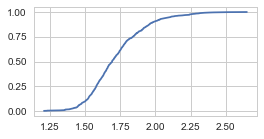

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['std'])
plt.plot(ecdf.x, ecdf.y)
plt_configure(figsize=(4,2))
std_standard = sp.optimize.brentq(lambda x: ecdf(x)-0.97 , 0, 4)
print(std_standard)

## 3.2 Scatter

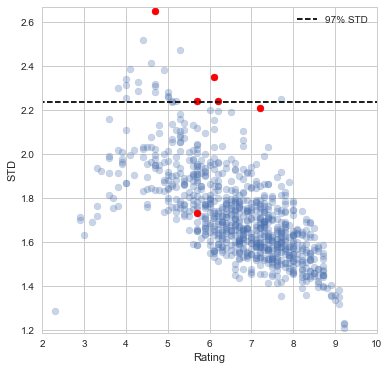

In [22]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3, label='')
plt.plot([0,10],[std_standard,std_standard], linestyle='--', color='black', label='97% STD')
sub_df = df[df['name'].str.contains("西游伏妖|杜拉拉升职记|夏有乔木|爸爸去哪|刺客聂隐娘|一步之遥")] # |
ax.scatter(sub_df.db_rating, sub_df['std'], color='red', label='')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'D:\movie_output\popular.html', show_ratings_num=False, click=True, show_distribution=True)

In [23]:
movie_list2(df[df['name'].str.contains("西游伏妖|夏有乔木|爸爸去哪|刺客聂隐娘")])

In [24]:
# movie_list2(df[df['name'].str.contains("杜拉拉升职记|苏乞儿|邻家特工|我11")])

## 3.3 Big deviation movies

In [25]:
movie_list(df.sort_values(by='std',ascending=False), len=30)

## 3.4 Timeshift

In [27]:
std_925 = sp.optimize.brentq(lambda x: ecdf(x)-0.925 , 0, 4)
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.4, label='')
    ax.axis([2,10,df['std'].min(),df['std'].max()])
    plt.plot([0,10],[std_925, std_925], linestyle='--', color='black', label='92.5% STD')
    sub_df_outliers = sub_df.query("std >= @std_925")
    ax.scatter(sub_df_outliers .db_rating, sub_df_outliers ['std'], alpha=0.5, color='red', label='')
    plt_configure(title=str(year)+ ': '+ str(len(sub_df_outliers))+'/'+str(len(sub_df)), 
                  xlabel='Rating', ylabel='STD', figsize=(2.5, 2.5), legend=True)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADGCAYAAACXUs/uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXt0FeW5/z8zs6+5ESAk3CQENMVKKxcpcECwYAutbQEN
AlGiC1YPImqRq1iKKMilWqWAlILHIwaoVOpagD+LxwtKBQ8Kh1CDXDTINZALue7snb33zLy/PzYZ
CYGdgCQ7Ie9nLdZizzv7nW+S+c57e95nFCGEQCKRXBY10gIkksaMNIhEEgZpEIkkDNIgEkkYpEEk
kjBIg0gkYZAGuU6cO3eOJ554gr59+zJgwADmzJlDaWmpVR4MBnnuuefo27cvffv25Y9//COGYdS5
3OPx8PTTT9OvXz/69evH7NmzKS4urrO+2uoHOHbsGHfffTcA+/fv5wc/+EG1fz179ryq+m4IhOR7
o+u6GDVqlJgwYYI4dOiQOHDggBg1apSYNGmSdc6SJUvEz372M7F//36xa9cuMWDAAPHKK6/UuXzG
jBkiLS1NHDx4UGRnZ4tRo0aJRx99tM4aa6tfCCEyMzPFvHnzhBBC/P3vfxe/+tWvRH5+vvWvsLDw
quq7EZAGuQ58+eWXIjU1VeTn51vH9u7dK1JTU0VpaamorKwUt99+u/jggw+s8rffflv0799fGIZR
a7kQQvTq1Uts27bNKt+6davo0aNHnfTVpX4hhJg0aZJ47733hBBCLFq0SEydOvV71XcjILtY14EO
HTqwdu1a2rRpYx1TFAWAsrIyDh06hM/n4yc/+YlVfscdd3D+/HlOnjxZazlAy5Yt2bZtG+Xl5Xg8
Ht555x26d+9unT9+/HjGjx9/WX11qV/Xdfbt20e/fv0A+Oabb0hJSbnm+m4UbJEWcCPQsmVLBg0a
VO3Y66+/TnJyMh07duTgwYO43W5iY2Ot8ioznTt3jtLS0rDlnTt3ZsGCBcycOZM+ffoAcNNNN7Fx
40br/BUrVlxRX15eXq31Z2Vl0aVLF+Li4gDIycnB6XTym9/8huLiYvr06cNTTz1FYmJineq7UZAt
SD2wZs0a3n//fX7/+98D4PP5cDqd1c5xOBwABAKBWsshNIBOSUlh3bp1rFu3jtjYWGbOnIm4EEoX
Hx9PfHz8ZfXUpf5du3YxYMAAACoqKjh79iyBQICFCxfy4osvkpuby8SJEwkGg3Wq70ZBtiDXmVde
eYXly5czb948Bg8eDIDL5apx41R9drvdtZafPHmShQsXsn37dpKTk4FQizF06FA+//xz+vbtG1ZT
bfVDyCCzZs0CIDo6mr179+J2u7HZQrfIypUrufPOO/n888/rVN+NgmxBriPPP/88K1asYP78+Tzw
wAPW8bZt2+L1evF4PNaxgoICAJKSkmotz87OxuVyWeaA0LinZcuWnDp1qlZdtdVfVlbG8ePH6dGj
h1UeGxtrmQMgISGB+Ph48vLyaq3vRkIa5Drx5z//mfXr17N48WLGjRtXraxbt2643W727dtnHdu7
dy8JCQl06tSp1vKkpCS8Xi+nT5+2ygsLCykpKaFTp061aqut/s8++4zevXtbhjhw4AA9e/asdr3c
3FyKioro2rVrrfXdUER6Gu1G4ODBg6Jbt27ij3/8Y7V1g/z8fBEMBoUQQixYsEAMGTJE7N27V+ze
vVsMGDBArF692qojXLmu6+Lee+8VY8eOFV9++aU4ePCgGD9+vEhLS7OmVYuLi0VxcfEVNYar/w9/
+INYv369da7f7xfDhw8X48ePt9Z1Ro8eLR5++OE61XcjIQ1yHXjppZdEamrqZf8dOXJECBFaO5g7
d67o1auX6Nevn1i6dGm1NYPaygsKCsT06dNF//79Rb9+/cT06dPF+fPnrfIHH3xQPPjgg1fUGK7+
oUOHimPHjlU7/9SpU2LKlCmiT58+onfv3mLWrFmipKSkznpvFBQh5I5CieRKyDGIRBIGaRCJJAzS
IBJJGKRBJJIwSINIJGGQBpFIwtDkY7EuXs2VSGqjd+/eV3V+kzcIXP0PXV/s27dPammkOuDaHqay
iyWRhEEaRCIJgzSIRBIGaRCJJAzSIBJJGKRBJJIwSINIJGG4IdZBJNdGIBBgzpw5nDp1ipiYGObN
m0fnzp05dOgQCxYsQNM0HA4HS5cuJSEhodp3R40aRUxMDAAdO3Zk8eLF7Ny5k+XLl9O+fXuWLVuG
qqr893//N0lJSXTs2LHG9T/55BNee+01hBBUVlby4IMP8pvf/Ibp06eTn5/PmTNnsNvtJCYmkpqa
ys9//nOmTp3KzTffjBACXdfJyMjgl7/8Zf39kiK7X+v7s3fv3khLsGhqWjIzM8XcuXOFEELk5OSI
CRMmCCGEeOCBB8RXX30lhBDib3/7m1i0aFG171VWVooRI0bUqG/SpEmitLRULFiwQBw8eFAcOnRI
zJgx44rXHzx4sCgtLRVCCFFeXi6GDBlSLb3p8uXLxcaNG63P//u//1st26PH4xGjRo2ytNbGtfx9
6qUFCQaDPP3005w5c4ZAIMDkyZMZOnSoVf7666/z1ltv0apVKwCeffZZOnfuzPz58zly5AgOh4OF
CxdWy+LRHLhcwrVx48axePHiqy4PBALk5uaGvd4333xjJbzr0qULOTk5ALz00kskJiYCYBhGjRxY
hw8fxufzMWHCBHRdZ9q0afTo0YPo6GgqKyvx+/243W5WrlzJyJEjr3j92NhY3njjDYYNG8bNN9/M
P//5Tyu/Vl2Ijo5mzJgxbN++nVtvvbXO37sa6mUMsnXrVuLj49m4cSOvvvoqCxYsqFaenZ3N0qVL
yczMJDMzky5duvDBBx8QCATYtGkT06dPZ8mSJfUhTXIRt956Kzt27EAIQVZWFnl5eRiGYZnj//7v
/1i/fj0PP/xwte+5XC4mTpzIf/3Xf/Hss88yY8YMdF3n0UcfZfHixXTo0IGTJ0/Sq1cvdu/ezbx5
89i/f3+N67/22mv4fD6mTZvGwIED+etf/2olwqsrrVu3vqos91dLvbQgw4cPZ9iwYQAIIdA0rVr5
wYMHWbNmDQUFBdx1111MmjSJffv2ceeddwLQo0cPsrOz60Nao+b48ePXrbwucUf33XcfOTk5pKen
06tXL2677Tbrb/Xuu+/yl7/8hTVr1lgtfRUpKSkkJyejKAopKSnEx8dTUFBA165defnllzEMg6lT
p7Jw4UIeffRR1q1bx+TJk1m7dq1VR2lpKbm5ucycOZOZM2eSl5fH448/zm233caQIUNq1V5Fbm4u
bdu2rfP5V0u9GCQ6OhoIvdPiiSeeYOrUqdXK77nnHtLT04mJieGxxx5jx44deDwea9AHoGkauq5X
S152JRpTRG9T0nL06FHatGnDjBkzOHbsGNnZ2ezbt49PP/2UDz/8kBkzZpCfn09+fn61773//vuc
OnWKCRMmUFxcTGFhIadOnbK6dO+//z4/+tGPyMrKQgjB/v37yc/Pr6anpKSEefPmsWDBAlq0aIFp
mthsNk6cOGGdl5ubi9frtT4fPXqUoqIi67PX6+WNN97gd7/7Xb393ustq8nZs2eZMmUK6enppKWl
WceFEHg8Hivx8YYNGygpKaGsrIzbb7/dmpEYNGgQO3furPU6jS1atClpKSoqYtq0afh8PmJjY3n+
+edJSEigf//+tGvXzkpk3adPH5544glmzZrF1KlTSUhIYM6cOeTm5qIoCjNmzKBXr15A6KE4d+5c
li1bBsDkyZM5f/486enpNcYjH374IatWrcJms2EYBnfddRePPfaYVb5ixQoSEhKsRHx79uyxZrFU
VcUwDDIyMvj5z39+3X4nNbjqYX0dKCgoEMOHDxe7d++uUVZWViYGDRokPB6PME1TPP744+Ljjz8W
27dvF7NnzxZ

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

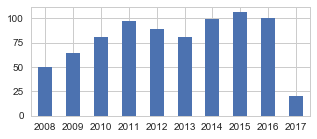

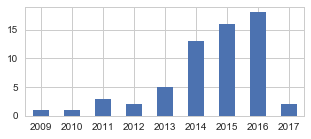

In [28]:
df.query("year >= 2008")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
plt.xticks(rotation=0)
# plt_configure(title='豆瓣评分超过2W的电影数量')
plt.figure()
df.query("std >= @std_925")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
# plt_configure(title='标准差STD在92.5%以上的电影分布')
plt.xticks(rotation=0)

# 4. Cluster analysis

In [29]:
from sklearn.cluster import KMeans
X = df[['1_star','2_star','3_star','4_star','5_star']].as_matrix()

n_clusters = 6
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1).fit(X)

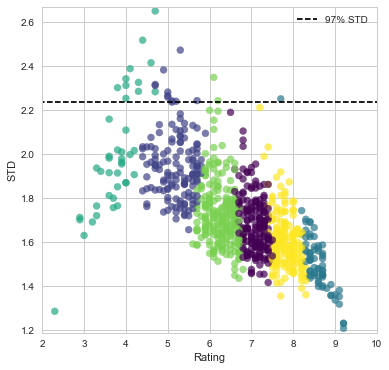

In [30]:
df['cluster'] = kmeans_model.labels_
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'D:\movie_output\clusters.html', show_ratings_num=False, click=True, show_distribution=True)

### 3.3.1 Cross validation of the number of clustering

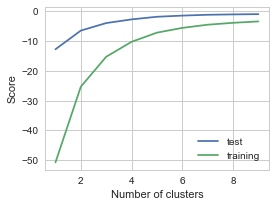

In [31]:
from sklearn.model_selection import GridSearchCV

cluster_range = arange(1,10)
grid = GridSearchCV(KMeans(random_state=1), {'n_clusters': cluster_range}, cv=5, n_jobs=-1) 
grid.fit(X)

plt.plot(cluster_range, grid.cv_results_['mean_test_score'], label='test')
plt.plot(cluster_range, grid.cv_results_['mean_train_score'], label='training')
plt_configure(figsize=(4,3), xlabel='Number of clusters', ylabel='Score', legend=True)

### 3.3.2 Cluster centroids

In [32]:
def prettyfloat(float):
    return "%0.1f" % float

In [33]:
vmin, vmax = df['cluster'].min(), df['cluster'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.get_cmap('viridis')
colors = cmap(norm(arange(vmin, vmax+1)))

In [34]:
x=arange(1,6) # 5 rating types
for cluster, color in zip(kmeans_model.cluster_centers_, colors):
    plt.figure()
    rating_avg=np.dot(cluster, arange(2,12,2))
    plt.bar(x, cluster, alpha=0.7, color=color)
    plt.ylim([0,0.5*1.1])
    plt_configure(title='Rating: '+prettyfloat(rating_avg), figsize=(3.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOYAAAC4CAYAAAD37pA8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAD3hJREFUeJzt3WtMk2cfBvAL2lWx6NCAy5JFo4gu8xBBY2LQ4Qk1MJAJ
S1HWssgiW+JwylAkEetwCEHd8gpodHMeooHNEYIG51Q6zSAyheBUFBZEhsw5UBstFUtp3w/ETifS
Slt6j16/T9I+h0vIxdPDzb8eZrPZDCISiqerAxDR81hMIgGxmEQCYjGJBMRiEgmIxSQSkNTVAdzB
vHnz0NLS8sxtQ4YMwZtvvol169YhMDDQpuO0t7ejtLQU7733HgAgNTUVer0e//vf/xye+d+USiV+
/fXX525/4403cObMmV73/eOPPxAZGYny8nLI5XJnRRxQPPg+pvPNmzcPCoUCS5cuBQCYzWb89ddf
2LFjB65du4YzZ87A29vb6nFyc3NRVlaGoqIiAMDDhw9hNpsxbNgwp+YHAK1Wi87OTsvXra2tiIuL
Q3JyMt5///0X7nfr1i0kJCTg5s2bqK6uZjFtxIey/UQul8PPzw9+fn4YOXIkpkyZgqysLGi1WlRW
Vtp0jH//Dh06dGi/lBIAfHx8LPn9/PyQm5uLwMDAXkt57NgxREdHw8vLq18yDiQspgvJZDIAgEQi
AQDo9Xqo1WrMmjULEydOREhICHbv3g0AKCoqQm5uLq5evYoJEybg1q1bSE1NRVJSkuX+pUuXYu/e
vQgODsbUqVORnJwMvV5vOV9paSkWLVqEKVOmIDExEVu2bEFqaiqA7ivbhAkTLFfj3ly8eBFnz55F
Wlpar9tpNBqkpKRgw4YNL//NcXN8juki9+7dwxdffAE/Pz9Mnz4dALB161ZcvnwZ+fn5GD58OE6e
PImcnBy8/fbbCAsLw++//46Kigp8/fXXGDFixHPHrK+vx2uvvYYDBw6gpaUFSUlJmDx5Mj744ANU
V1cjJSUF69atw+zZs1FcXIw9e/YgKioKAPD666/jl19+wdChQ61m37VrFxYvXoxx48b1ut2OHTsA
wOZHBPQPFrOfZGVlYfv27QAAk8mErq4uTJ8+Hd9++63l+WVQUBBiY2MxceJEAMCHH36IvLw81NfX
46233sKQIUMgkUjg5+fX4zk6OzuRkZEBX19fjBs3DrNnz8bly5cBAIcPH8bcuXMRHx8PAFi7di3O
nz9v2be34z6tqakJ5eXlOHr0aN+/GWQVi9lPEhMTERkZCYPBgCNHjuDUqVNYtWoVAgICLNtERUVB
o9GgpKQEjY2NuHbtGvR6PUwmk03nkMvl8PX1tXzt7e1teShbV1eHiIiIZ7afOnUqHjx48FL/jxMn
TsDf3x+TJk16qf3o5fA5Zj8ZPnw4Ro8ejYCAAGzatAnTpk3Dxx9/jNu3b1u2SUtLg1qtxqBBg7Bk
yRIUFBS81Is7r7zyygvvk0qlNhe8N2fPnkVoaKjdx6HesZgusmnTJkgkEqjVagDA/fv3UVRUhOzs
bKxduxbh4eGQyWSWt0QAwMPDo8/nCwgIwNWrV5+57cnDXFsZjUZcuXIFM2bM6HMOsg2L6SIjRoxA
cnIyfv75Z5w+fRre3t6Qy+U4deoUmpubUVVVhU8++QRmsxkGgwFA96KEtrY2NDc3w2g0vtT5VCoV
NBoNDh48iJs3byI3NxfV1dWWsnd1daG1tRUdHR0vPEZjYyMMBkOPL/rYsj/ZjsV0oZiYGAQGBiIz
MxNGoxHbt29HRUUFwsPDsX79egQHByMkJMRypVu0aBHkcjnCwsJQW1v7UueaPHkyMjMzsX//fkRE
RKC2thbz58+3PPy9ffs2Zs2ahdLS0hceo62tDUD3e5r/Zsv+ZDuu/HETv/32G+RyOfz9/S23rVy5
ElOmTMGqVatcmIx6wiumm6ipqUFCQgIuXLiAlpYWFBYW4vz581i4cKGro1EPeMV0E0ajEdu2bcPx
48fx4MED+Pv7Y/Xq1ZgzZ46ro1EPWEwiAfGhLJGAWEwiAbGYRALq97WyVVVV/X1KIqFNmzbtudtc
soi9pyCOUlVV5dTj9wUz2cYdM73oQsWHskQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgKy+j2ky
maBWq1FXVweZTIYtW7Zg9OjRlvv379+P77//3jJOcfPmzRg7dqzzEhO5AavFPH36NAwGAwoLC1FT
U4OsrCzs2rXLcv+VK1eQnZ3NqWlEDmS1mFVVVZg9ezaA7nGHV65ceeb+q1evYs+ePWhtbcWcOXOQ
mJjonKREbsRqMXU63TMfeCORSGA0GiGVdu8aHh6O5cuXw9vbG6tWrYJGo8HcuXN7Paaz18uKuB6X
mWzDTN2sFtPb2xvt7e2Wr00mk6WUZrMZ8fHxlrH6ISEhqK2ttVpMrpV1PWayjbBrZYOCgnDu3DkA
3XNjxo8fb7lPp9PhnXfeQXt7O8xmMyorK/lck8gBrF4xQ0NDUV5ejtjYWJjNZmRmZuLYsWPQ6/VQ
KBRYs2YNVCoVZDIZZs6ciZCQkP7ITTSgWS2mp6cnPv/882due3oEYlRUlOUTo4jIMbjAgEhALCaR
gFhMIgGxmEQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBMRiEgmIxSQSEItJ
JCAWk0hAVotpMpmQnp4OhUIBpVKJpqamHrfbuHEjtm3b5vCARO7IajGfHvicnJyMrKys57YpKChA
fX29UwISuSO7Bz5XV1fj0qVLUCgUuHHjhnNSUo82Rj7/S9JWWq0WxT6n+rRvRklqn89LtrFr4PPf
f/+NvLw85Obm4sSJEzaflAOfHUOr1bpkf2d+f93lZ2eNXQOff/zxR9y/fx8rV65Ea2srOjo6MHbs
WCxdurTXY3Lgs2P09YoHdJfSx8enT/s66/vrTj+7p4/fE6vFDAoKgkajQVhY2HMDn1UqFVQqFQCg
qKgIN27csFpKIrLO7oHPRE/j817HsHvg8xO8UhI5DhcYEAmIxSQSEItJJCAWk0hALCaRgFhMIgGx
mEQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBGT3XNmTJ08iOjoaMTExOHDg
gNOCErkTu+bKdnV1Yfv27di/fz8KCwtx5MgR3Lt3z6mBidyBXXNlJRIJSktLIZVKcffuXZhMJshk
MuelJXITVq+YL5or+4RUKsVPP/2EJUuWYMaMGfDy8nJOUiI3Ytdc2ScWLlyIBQsWIDU1FcXFxYiO
ju71mBz47BgiDnwWMZO9hBz43NtcWZ1Oh48++gj79u2DTCaDl5cXPD2tv9DLgc+OIeLAZxEz2UPY
gc/W5spGREQgLi4OUqkUEyZMQGRkpMPDE7kbu+fKKhQKDn4mcjAuMCASEItJJCAWk0hALCaRgFhM
IgGxmEQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBMRiEgmIxSQSkNUJBiaT
CWq1GnV1dZDJZNiyZQtGjx5tuf/48eM4cOAAJBIJxo8fD7VabdPcHyJ6MbsGPnd0dOCrr77CwYMH
UVBQAJ1OB41G49TARO7AajF7G/gsk8lQUFBgmSVrNBoxaNAgJ0Ulch9WH8q+aOCzVCqFp6cnfH19
AQCHDh2CXq9HcHCw1ZNyrqxjiDjDVcRM9hJyrqy1gc8mkwk5OTlobGzEzp074eHhYfWknCvrGCLO
cBUxkz1cNVfW6kPZoKAgnDt3DgCeG/gMAOnp6Xj8+DHy8/P58QhEDmLXwOdJkybh6NGjmD59OuLj
4wEAKpUKoaGhTg9ONJDZPfD5+vXrjk9F5Ob4hiORgFhMIgGxmEQCYjGJBMRiEgmIxSQSEItJJCAW
k0hALCaRgFh

In [35]:
for cluster in arange(0, n_clusters):
    display(movie_list(df.query('cluster == @cluster').sort_values(by='std',ascending=False), len=8))

In [ ]:
# movie_list2(df[df['name'].str.contains("夏洛特烦恼|魔兽|小王子|爱乐之城")])
# movie_list2(df[df['name'].str.contains("窃听风云|钢铁侠|明日边缘|国王的演讲")])
# movie_list2(df[df['name'].str.contains("小团圆|小时代4|长城")])

## 3.4 Misc analysis

In [36]:
# sub_df = df[df['name'].str.contains("西游")]
# movie_list(sub_df.sort_values(by='std',ascending=False))

In [37]:
df[df['name'].str.contains("大话天仙")]

,1_star,2_star,3_star,4_star,5_star,movie_tt_id,image_url,db_rating,db_ratings_count,name,douban_url,year,mode,std,std2,cluster
1378,0.661,0.231,0.081,0.012,0.015,,https://img3.doubanio.com/view/movie_poster_co...,3.0,23184,大话天仙,https://movie.douban.com/subject/4913222/,2014,2,1.629724,1.900526,3


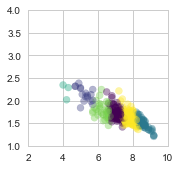

In [38]:
sub_df = df.query("db_ratings_count > 100000")
fig, ax = plt.subplots()
scatter_plot = ax.scatter(sub_df['db_rating'], sub_df['std'], c=sub_df['cluster'], alpha=0.4, cmap='viridis')
ax.axis([2,10,1,4])
plt_configure(figsize=(2.5,2.5))
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, sub_df, 'D:\movie_output\clusters2.html', show_ratings_num=False, click=True)